In [25]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import scipy.cluster.hierarchy as sch
import time

In [26]:
# Importing Dataset
dataset = pd.read_csv('C:\\Users\\Nelson\\Desktop\\milan csv\\milan training\\sms-call-internet-mi-2013-11-01.csv')

In [27]:
# Showing the first 10 columns of the dataset
dataset.head(10)

datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0  2013-11-01 00:00:00       1            0  0.3521     NaN     NaN   0.0273   
1  2013-11-01 00:00:00       1           33     NaN     NaN     NaN      NaN   
2  2013-11-01 00:00:00       1           39  1.7322  1.1047  0.5919   0.4020   
3  2013-11-01 00:00:00       2            0  0.3581     NaN     NaN   0.0273   
4  2013-11-01 00:00:00       2           33     NaN     NaN     NaN      NaN   
5  2013-11-01 00:00:00       2           39  1.7334  1.0880  0.6020   0.4109   
6  2013-11-01 00:00:00       3            0  0.3644     NaN     NaN   0.0273   
7  2013-11-01 00:00:00       3           33     NaN     NaN     NaN      NaN   
8  2013-11-01 00:00:00       3           39  1.7348  1.0701  0.6128   0.4203   
9  2013-11-01 00:00:00       4            0  0.3349     NaN     NaN   0.0273   

   internet  
0       NaN  
1    0.0261  
2   57.7729  
3       NaN  
4    0.0274  
5   57.8875  
6       NaN  
7    0.0287  
8   58.0095  
9       NaN

In [28]:
# Shape of the dataset
dataset.shape

(1891928, 8)

In [29]:
# NuLL values in the dataset
dataset.isnull().any()

datetime       False
CellID         False
countrycode    False
smsin           True
smsout          True
callin          True
callout         True
internet        True
dtype: bool

In [30]:
# Sum of the all null cells in the rows in the dataset
dataset.isnull().sum()

datetime             0
CellID               0
countrycode          0
smsin          1086153
smsout         1422446
callin         1407781
callout        1037413
internet       1087074
dtype: int64

In [31]:
# Taking the null dataset into seperate column
null_data = dataset[dataset.isnull().any(axis=1)]

In [32]:
# Showing the forst 10 columns of the null data 
null_data.head(10)

datetime  CellID  countrycode   smsin  smsout  callin  callout  \
0   2013-11-01 00:00:00       1            0  0.3521     NaN     NaN   0.0273   
1   2013-11-01 00:00:00       1           33     NaN     NaN     NaN      NaN   
3   2013-11-01 00:00:00       2            0  0.3581     NaN     NaN   0.0273   
4   2013-11-01 00:00:00       2           33     NaN     NaN     NaN      NaN   
6   2013-11-01 00:00:00       3            0  0.3644     NaN     NaN   0.0273   
7   2013-11-01 00:00:00       3           33     NaN     NaN     NaN      NaN   
9   2013-11-01 00:00:00       4            0  0.3349     NaN     NaN   0.0273   
10  2013-11-01 00:00:00       4           33     NaN     NaN     NaN      NaN   
12  2013-11-01 00:00:00       5            0  0.3178     NaN     NaN   0.0237   
13  2013-11-01 00:00:00       5           33     NaN     NaN     NaN      NaN   

    internet  
0        NaN  
1     0.0261  
3        NaN  
4     0.0274  
6        NaN  
7     0.0287  
9        NaN  
10    0.0226  
12       NaN  
13    0.0217

In [33]:
# Taking all the not-null data to train the modek
non_null_data = dataset.dropna().copy()

In [34]:
# Showing the forst 10 columns of the non-null data 
non_null_data.head(10)

datetime  CellID  countrycode   smsin  smsout  callin  callout  \
2   2013-11-01 00:00:00       1           39  1.7322  1.1047  0.5919   0.4020   
5   2013-11-01 00:00:00       2           39  1.7334  1.0880  0.6020   0.4109   
8   2013-11-01 00:00:00       3           39  1.7348  1.0701  0.6128   0.4203   
11  2013-11-01 00:00:00       4           39  1.7284  1.1533  0.5627   0.3763   
14  2013-11-01 00:00:00       5           39  1.5530  1.0439  0.5110   0.3503   
17  2013-11-01 00:00:00       6           39  1.7348  1.0701  0.6128   0.4203   
20  2013-11-01 00:00:00       7           39  1.7348  1.0701  0.6128   0.4203   
23  2013-11-01 00:00:00       8           39  1.7348  1.0701  0.6128   0.4203   
26  2013-11-01 00:00:00       9           39  1.7348  1.0701  0.6128   0.4203   
29  2013-11-01 00:00:00      10           39  0.9149  0.4990  0.4043   0.3287   

    internet  
2    57.7729  
5    57.8875  
8    58.0095  
11   57.4408  
14   52.1497  
17   58.0095  
20   58.0095  
23   58.0095  
26   58.0095  
29   33.5432

In [35]:
# Making another data for clusturing
clus_data = non_null_data.iloc[:10000, [1, 7]].copy()
clus_data.head(10)

CellID  internet
2        1   57.7729
5        2   57.8875
8        3   58.0095
11       4   57.4408
14       5   52.1497
17       6   58.0095
20       7   58.0095
23       8   58.0095
26       9   58.0095
29      10   33.5432

In [36]:
clus_data.describe()

CellID      internet
count  10000.000000  10000.000000
mean    4956.777700    361.750960
std     2912.682465    635.489667
min        1.000000      0.011000
25%     2437.750000     62.636925
50%     4955.500000    153.916100
75%     7469.250000    354.089600
max    10000.000000   8673.541500

In [37]:
clus_data.shape

(10000, 2)

In [38]:
# Saving the clus_data dataframe into a csv file
clus_data.to_csv('cluster_data.csv')

# HIERARCHICAL CLUSTERING.

In [39]:
%%time
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(clus_data, 'single')

Wall time: 1.94 s


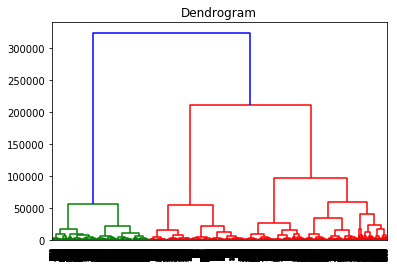

Wall time: 2min 45s


In [40]:
%%time
# Making Dendrogram for clustering algorithm
dendrogram = sch.dendrogram(sch.linkage(clus_data, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [41]:
# Fitting Hierarchical Clustering to the dataset
no_cluster_hc = 3 # You can change this for experimentation

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = no_cluster_hc, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clus_data)

In [42]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_hierarchical = clus_data.join(pd.DataFrame(y_hc)).fillna(method='ffill')

In [43]:
clus_corresonding_data_hierarchical.head(100)

CellID  internet    0
2         1   57.7729  2.0
5         2   57.8875  2.0
8         3   58.0095  2.0
11        4   57.4408  2.0
14        5   52.1497  2.0
17        6   58.0095  2.0
20        7   58.0095  2.0
23        8   58.0095  2.0
26        9   58.0095  2.0
29       10   33.5432  2.0
32       11   18.0073  2.0
35       12   15.7121  2.0
40       13    9.4991  2.0
44       14   15.3484  2.0
48       15   16.2880  2.0
51       16   18.2183  2.0
55       17   20.1801  2.0
58       18   20.1801  2.0
61       19   20.1801  2.0
64       20   20.1801  2.0
67       21   20.1801  2.0
70       22   20.1801  2.0
73       23   20.7411  2.0
76       24   24.7979  2.0
79       25   24.9137  2.0
82       26   24.9137  2.0
85       27   25.6606  2.0
88       28   27.7765  2.0
91       29   31.8360  2.0
93       30   33.8924  2.0
..      ...       ...  ...
244      71   62.6778  2.0
252      72   67.8238  2.0
260      73   74.4785  2.0
268      74   74.7275  2.0
276      75   74.7519  2.0
284      76   74.7519  2.0
292      77   74.7519  2.0
300      78   74.7519  2.0
308      79   74.7519  2.0
316      80   56.6587  2.0
323      81   26.7272  2.0
329      82    9.5847  2.0
349      86   10.6375  2.0
355      87   17.6609  2.0
360      88   18.9375  2.0
363      89   18.9375  2.0
366      90   18.9375  2.0
370      91   22.2722  2.0
376      92   26.9700  2.0
382      93   41.3453  2.0
389      94   73.1404  2.0
396      95   73.1404  2.0
403      96   73.1404  2.0
410      97   73.1404  2.0
417      98   73.1659  2.0
424      99   73.1404  2.0
431     100   73.1404  2.0
438     101   57.7154  2.0
442     102   52.4424  2.0
447     103   58.0095  2.0

[100 rows x 3 columns]

In [44]:
# Save this datframe
clus_corresonding_data_hierarchical.to_csv('clus_corresonding_data_hierarchical.csv')

In [45]:
clus_corresonding_data_hierarchical.describe()

CellID      internet             0
count  10000.000000  10000.000000  10000.000000
mean    4956.777700    361.750960      1.720700
std     2912.682465    635.489667      0.644308
min        1.000000      0.011000      0.000000
25%     2437.750000     62.636925      2.000000
50%     4955.500000    153.916100      2.000000
75%     7469.250000    354.089600      2.000000
max    10000.000000   8673.541500      2.000000

In [46]:
clus_corresonding_data_hierarchical.head()

CellID  internet    0
2        1   57.7729  2.0
5        2   57.8875  2.0
8        3   58.0095  2.0
11       4   57.4408  2.0
14       5   52.1497  2.0

There are 3 clusters


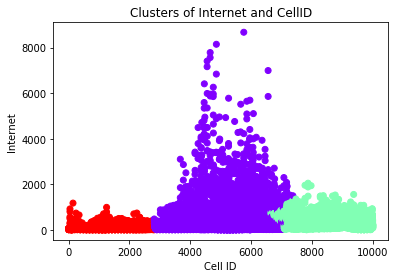

In [47]:
# Plot the clustering 
plt.scatter(clus_data.iloc[:,0],clus_data.iloc[:,1], c=y_hc, cmap='rainbow')
plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')
print(f'There are {no_cluster_hc} clusters')

In [97]:
# this code will filter and give you the specific cluster data
from IPython.core.display import HTML
cluster = 2  # You can change this number 
specific_cluster = display(HTML(clus_corresonding_data_hierarchical.loc[clus_corresonding_data_hierarchical[0] == cluster].to_html()))

# K-MEANS CLUSTERING

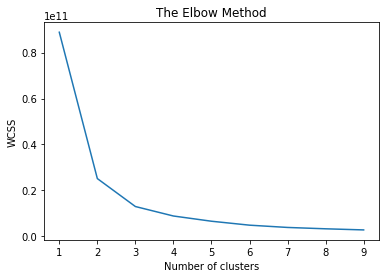

In [49]:
#We are using the elbow method to find the optimal number of clusters


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clus_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

By elbow method we have seen that 3 cluster is good

In [50]:
# Fitting K-Means to the dataset
no_cluster_k_means = 3

kmeans = KMeans(n_clusters = no_cluster_k_means, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clus_data)

In [51]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_kmeans = clus_data.join(pd.DataFrame(y_kmeans)).fillna(method='ffill')

In [52]:
clus_corresonding_data_kmeans.head(100)

CellID  internet    0
2         1   57.7729  2.0
5         2   57.8875  2.0
8         3   58.0095  2.0
11        4   57.4408  2.0
14        5   52.1497  2.0
17        6   58.0095  2.0
20        7   58.0095  2.0
23        8   58.0095  2.0
26        9   58.0095  2.0
29       10   33.5432  2.0
32       11   18.0073  2.0
35       12   15.7121  2.0
40       13    9.4991  2.0
44       14   15.3484  2.0
48       15   16.2880  2.0
51       16   18.2183  2.0
55       17   20.1801  2.0
58       18   20.1801  2.0
61       19   20.1801  2.0
64       20   20.1801  2.0
67       21   20.1801  2.0
70       22   20.1801  2.0
73       23   20.7411  2.0
76       24   24.7979  2.0
79       25   24.9137  2.0
82       26   24.9137  2.0
85       27   25.6606  2.0
88       28   27.7765  2.0
91       29   31.8360  2.0
93       30   33.8924  2.0
..      ...       ...  ...
244      71   62.6778  2.0
252      72   67.8238  2.0
260      73   74.4785  2.0
268      74   74.7275  2.0
276      75   74.7519  2.0
284      76   74.7519  2.0
292      77   74.7519  2.0
300      78   74.7519  2.0
308      79   74.7519  2.0
316      80   56.6587  2.0
323      81   26.7272  2.0
329      82    9.5847  2.0
349      86   10.6375  2.0
355      87   17.6609  2.0
360      88   18.9375  2.0
363      89   18.9375  2.0
366      90   18.9375  2.0
370      91   22.2722  2.0
376      92   26.9700  2.0
382      93   41.3453  2.0
389      94   73.1404  2.0
396      95   73.1404  2.0
403      96   73.1404  2.0
410      97   73.1404  2.0
417      98   73.1659  2.0
424      99   73.1404  2.0
431     100   73.1404  2.0
438     101   57.7154  2.0
442     102   52.4424  2.0
447     103   58.0095  2.0

[100 rows x 3 columns]

In [53]:
clus_corresonding_data_kmeans.describe()

CellID      internet             0
count  10000.000000  10000.000000  10000.000000
mean    4956.777700    361.750960      1.765900
std     2912.682465    635.489667      0.573699
min        1.000000      0.011000      0.000000
25%     2437.750000     62.636925      2.000000
50%     4955.500000    153.916100      2.000000
75%     7469.250000    354.089600      2.000000
max    10000.000000   8673.541500      2.000000

In [54]:
# Save this datframe
clus_corresonding_data_kmeans.to_csv('clus_corresonding_data_kmeans.csv')

There are 3 clusters


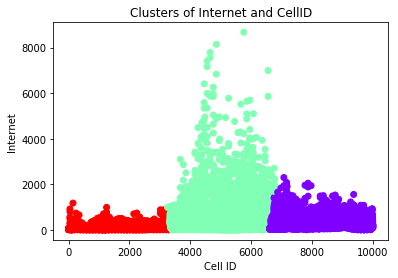

In [55]:
plt.scatter(clus_data.iloc[:,0],clus_data.iloc[:,1], c=y_kmeans, cmap='rainbow')
plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')
print(f'There are {no_cluster_k_means} clusters')

In [102]:
# this code will filter and give you the specific cluster data
from IPython.core.display import HTML
cluster = 2  # You can change this number 
display(HTML(clus_corresonding_data_kmeans.loc[clus_corresonding_data_kmeans[0] == cluster].to_html()))

# MEAN-SHIFT CLUSTERING

In [57]:
import numpy as np
import pandas as pd 
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [58]:
ms = MeanShift()
m_shift = ms.fit(clus_data)
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print("number of estimated clusters :", n_clusters)


[0 1 2]
number of estimated clusters : 3


In [59]:
cluster_centers

array([[1797.99115282,  115.29277083],
       [8178.3985025 ,  323.25008769],
       [5355.9296741 ,  429.33115981]])

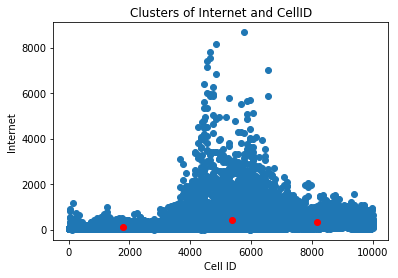

There are 3 clusters


In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot() 
plt.scatter(clus_data.iloc[:,0], clus_data.iloc[:,1], marker ='o', cmap = 'Paired') 
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker ='o', color ='red') 
plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')
plt.show() 
print(f'There are {len(cluster_centers)} clusters')

In [62]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_mean_shift = clus_data.join(pd.DataFrame(cluster_centers)).fillna(method='ffill')

In [63]:
clus_corresonding_data_mean_shift.head(100)

CellID  internet            0          1
2         1   57.7729  5355.929674  429.33116
5         2   57.8875  5355.929674  429.33116
8         3   58.0095  5355.929674  429.33116
11        4   57.4408  5355.929674  429.33116
14        5   52.1497  5355.929674  429.33116
17        6   58.0095  5355.929674  429.33116
20        7   58.0095  5355.929674  429.33116
23        8   58.0095  5355.929674  429.33116
26        9   58.0095  5355.929674  429.33116
29       10   33.5432  5355.929674  429.33116
32       11   18.0073  5355.929674  429.33116
35       12   15.7121  5355.929674  429.33116
40       13    9.4991  5355.929674  429.33116
44       14   15.3484  5355.929674  429.33116
48       15   16.2880  5355.929674  429.33116
51       16   18.2183  5355.929674  429.33116
55       17   20.1801  5355.929674  429.33116
58       18   20.1801  5355.929674  429.33116
61       19   20.1801  5355.929674  429.33116
64       20   20.1801  5355.929674  429.33116
67       21   20.1801  5355.929674  429.33116
70       22   20.1801  5355.929674  429.33116
73       23   20.7411  5355.929674  429.33116
76       24   24.7979  5355.929674  429.33116
79       25   24.9137  5355.929674  429.33116
82       26   24.9137  5355.929674  429.33116
85       27   25.6606  5355.929674  429.33116
88       28   27.7765  5355.929674  429.33116
91       29   31.8360  5355.929674  429.33116
93       30   33.8924  5355.929674  429.33116
..      ...       ...          ...        ...
244      71   62.6778  5355.929674  429.33116
252      72   67.8238  5355.929674  429.33116
260      73   74.4785  5355.929674  429.33116
268      74   74.7275  5355.929674  429.33116
276      75   74.7519  5355.929674  429.33116
284      76   74.7519  5355.929674  429.33116
292      77   74.7519  5355.929674  429.33116
300      78   74.7519  5355.929674  429.33116
308      79   74.7519  5355.929674  429.33116
316      80   56.6587  5355.929674  429.33116
323      81   26.7272  5355.929674  429.33116
329      82    9.5847  5355.929674  429.33116
349      86   10.6375  5355.929674  429.33116
355      87   17.6609  5355.929674  429.33116
360      88   18.9375  5355.929674  429.33116
363      89   18.9375  5355.929674  429.33116
366      90   18.9375  5355.929674  429.33116
370      91   22.2722  5355.929674  429.33116
376      92   26.9700  5355.929674  429.33116
382      93   41.3453  5355.929674  429.33116
389      94   73.1404  5355.929674  429.33116
396      95   73.1404  5355.929674  429.33116
403      96   73.1404  5355.929674  429.33116
410      97   73.1404  5355.929674  429.33116
417      98   73.1659  5355.929674  429.33116
424      99   73.1404  5355.929674  429.33116
431     100   73.1404  5355.929674  429.33116
438     101   57.7154  5355.929674  429.33116
442     102   52.4424  5355.929674  429.33116
447     103   58.0095  5355.929674  429.33116

[100 rows x 4 columns]

# DBSCAN CLUSTERING

Text(0, 0.5, 'Internet')

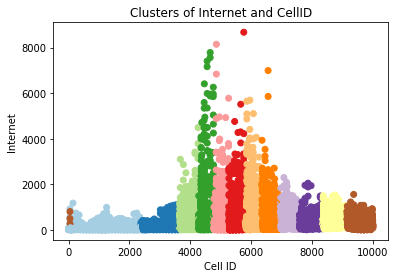

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np




# cluster the data into several clusters
dbscan = DBSCAN( eps=20, min_samples = 1)
dbscan_clusters = dbscan.fit_predict(clus_data)


labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

# plot the cluster assignments
plt.scatter(clus_data.iloc[:,0], clus_data.iloc[:,1], c=labels, cmap="Paired")

plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')


In [65]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_dbscan = clus_data.join(pd.DataFrame(dbscan_clusters)).fillna(method='ffill')

In [66]:
clus_corresonding_data_dbscan.head(1000)

CellID  internet      0
2          1   57.7729    0.0
5          2   57.8875    0.0
8          3   58.0095    0.0
11         4   57.4408    0.0
14         5   52.1497    0.0
17         6   58.0095    0.0
20         7   58.0095    0.0
23         8   58.0095    0.0
26         9   58.0095    0.0
29        10   33.5432    0.0
32        11   18.0073    0.0
35        12   15.7121    0.0
40        13    9.4991    0.0
44        14   15.3484    0.0
48        15   16.2880    3.0
51        16   18.2183    0.0
55        17   20.1801    0.0
58        18   20.1801    0.0
61        19   20.1801    0.0
64        20   20.1801    0.0
67        21   20.1801    4.0
70        22   20.1801    0.0
73        23   20.7411    0.0
76        24   24.7979    0.0
79        25   24.9137    0.0
82        26   24.9137    0.0
85        27   25.6606    0.0
88        28   27.7765    0.0
91        29   31.8360    0.0
93        30   33.8924    0.0
...      ...       ...    ...
4024     984   32.4784  618.0
4027     985   11.5888  606.0
4030     986   11.6380  622.0
4033     987   11.6380  624.0
4036     988   11.6380  624.0
4039     989   11.6380  624.0
4042     990   10.5128  626.0
4045     991    6.4413  626.0
4047     992    6.4029  626.0
4049     993    6.1963  626.0
4054     995    8.3440  626.0
4057     996   37.7724  628.0
4059     997   77.1578  627.0
4061     998   81.1748  627.0
4063     999   81.0755  627.0
4065    1000   78.5462  627.0
4068    1001   21.5292  627.0
4071    1002   21.2108  627.0
4077    1003   21.0612  627.0
4080    1004   22.1358  629.0
4084    1005   15.9862  632.0
4091    1006   18.3783  630.0
4097    1007   14.2504  639.0
4104    1008   30.3706  642.0
4109    1009   25.4949  645.0
4113    1010   26.5469  649.0
4117    1011   26.7187  652.0
4121    1012   27.4155  654.0
4125    1013   25.9195  658.0
4129    1014   23.6090  659.0

[1000 rows x 3 columns]

In [67]:
clus_corresonding_data_dbscan.to_csv('clus_corresonding_data_dbscan.csv')

In [68]:
# this code will filter and give you the specific cluster data
from IPython.core.display import HTML
cluster = 20 # You can change this number 
display(HTML(clus_corresonding_data_dbscan.loc[clus_corresonding_data_dbscan[0] == cluster].to_html()))

In [69]:
dg=dbscan.labels_

In [70]:
print(dg)

[0 0 0 ... 0 0 0]


Text(0, 0.5, 'cluster member')

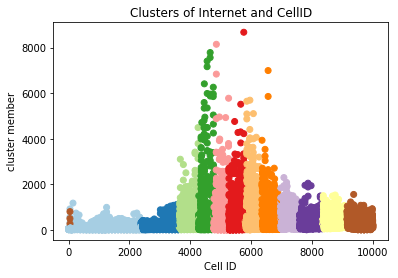

In [71]:
plt.scatter(clus_corresonding_data_dbscan.iloc[:,0], clus_corresonding_data_dbscan.iloc[:,1], c=dbscan_clusters, cmap="Paired")

plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('cluster member')

# FUZZYC-MEANS CLUSTERING

In [72]:
import pandas as pd
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter



In [73]:
clus_data = pd.read_csv('C:\\Users\\Nelson\\Desktop\\milan csv\\cluster_data.csv')

In [74]:
# fit the fuzzy-c-means
fcm = FCM(n_clusters=10)
fc_means = fcm.fit(clus_data)

In [75]:
# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

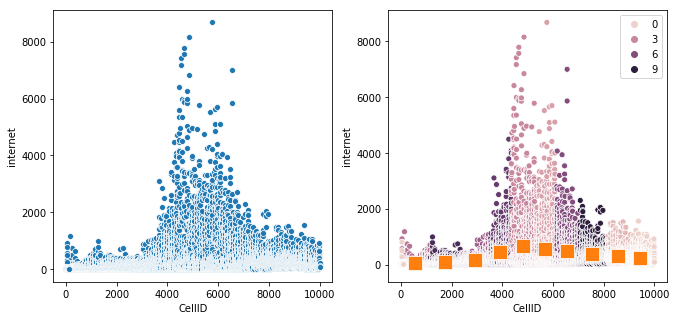

In [76]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(clus_data.iloc[:,1], clus_data.iloc[:,2], ax=axes[0],)
scatter(clus_data.iloc[:,1], clus_data.iloc[:,2], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers.iloc[:,1], fcm_centers.iloc[:,2], ax=axes[1],marker="s",s=200)
plt.show()


In [77]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_fuzzy = clus_data.join(pd.DataFrame(fcm_labels)).fillna(method='ffill')

In [78]:
clus_corresonding_data_fuzzy.head(100)

Unnamed: 0  CellID  internet  0
0            2       1   57.7729  4
1            5       2   57.8875  4
2            8       3   58.0095  4
3           11       4   57.4408  4
4           14       5   52.1497  4
5           17       6   58.0095  4
6           20       7   58.0095  4
7           23       8   58.0095  4
8           26       9   58.0095  4
9           29      10   33.5432  4
10          32      11   18.0073  4
11          35      12   15.7121  4
12          40      13    9.4991  4
13          44      14   15.3484  4
14          48      15   16.2880  4
15          51      16   18.2183  4
16          55      17   20.1801  4
17          58      18   20.1801  4
18          61      19   20.1801  4
19          64      20   20.1801  4
20          67      21   20.1801  4
21          70      22   20.1801  4
22          73      23   20.7411  4
23          76      24   24.7979  4
24          79      25   24.9137  4
25          82      26   24.9137  4
26          85      27   25.6606  4
27          88      28   27.7765  4
28          91      29   31.8360  4
29          93      30   33.8924  4
..         ...     ...       ... ..
70         244      71   62.6778  4
71         252      72   67.8238  4
72         260      73   74.4785  4
73         268      74   74.7275  4
74         276      75   74.7519  4
75         284      76   74.7519  4
76         292      77   74.7519  4
77         300      78   74.7519  4
78         308      79   74.7519  4
79         316      80   56.6587  4
80         323      81   26.7272  4
81         329      82    9.5847  4
82         349      86   10.6375  4
83         355      87   17.6609  4
84         360      88   18.9375  4
85         363      89   18.9375  4
86         366      90   18.9375  4
87         370      91   22.2722  4
88         376      92   26.9700  4
89         382      93   41.3453  4
90         389      94   73.1404  4
91         396      95   73.1404  4
92         403      96   73.1404  4
93         410      97   73.1404  4
94         417      98   73.1659  4
95         424      99   73.1404  4
96         431     100   73.1404  4
97         438     101   57.7154  4
98         442     102   52.4424  4
99         447     103   58.0095  4

[100 rows x 4 columns]

In [79]:
clus_corresonding_data_kmeans.describe()

CellID      internet             0
count  10000.000000  10000.000000  10000.000000
mean    4956.777700    361.750960      1.765900
std     2912.682465    635.489667      0.573699
min        1.000000      0.011000      0.000000
25%     2437.750000     62.636925      2.000000
50%     4955.500000    153.916100      2.000000
75%     7469.250000    354.089600      2.000000
max    10000.000000   8673.541500      2.000000

In [80]:
clus_corresonding_data_fuzzy.to_csv('clus_corresonding_data_fuzzy.csv')

In [81]:
# this code will filter and give you the specific cluster data
from IPython.core.display import HTML
cluster = 6 # You can change this number 
display(HTML(clus_corresonding_data_fuzzy.loc[clus_corresonding_data_fuzzy[0] == cluster].to_html()))

# GAUSSIAN MIXTURE CLUSTERING

In [82]:
import pandas as pd
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture

In [84]:
clus_data = pd.read_csv('C:\\Users\\Nelson\\Desktop\\milan csv\\cluster_data.csv')

Text(0, 0.5, 'Internet')

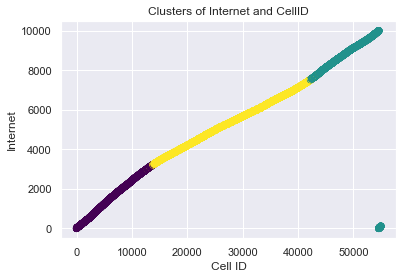

In [85]:
from sklearn.mixture import GaussianMixture
gmm =  GaussianMixture(n_components=3).fit(clus_data)
labels = gmm.predict(clus_data)
plt.scatter(clus_data.iloc[:, 0], clus_data.iloc[:, 1], c=labels, s=40, cmap='viridis');
plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')

In [86]:
probs = gmm.predict_proba(clus_data)
print(probs[:2].round(3))

[[1. 0. 0.]
 [1. 0. 0.]]


Text(0, 0.5, 'Internet')

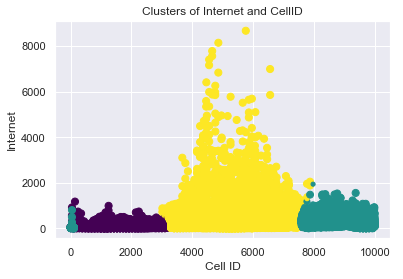

In [87]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(clus_data.iloc[:, 1], clus_data.iloc[:, 2], c=labels, cmap='viridis', s=size);
plt.title('Clusters of Internet and CellID')
plt.xlabel('Cell ID')
plt.ylabel('Internet')

In [88]:
# This code will show you which column correspond to which cluster
clus_corresonding_data_GMM = clus_data.join(pd.DataFrame(labels)).fillna(method='ffill')

In [89]:
clus_corresonding_data_GMM.head(1000)

Unnamed: 0  CellID  internet  0
0             2       1   57.7729  0
1             5       2   57.8875  0
2             8       3   58.0095  0
3            11       4   57.4408  0
4            14       5   52.1497  0
5            17       6   58.0095  0
6            20       7   58.0095  0
7            23       8   58.0095  0
8            26       9   58.0095  0
9            29      10   33.5432  0
10           32      11   18.0073  0
11           35      12   15.7121  0
12           40      13    9.4991  0
13           44      14   15.3484  0
14           48      15   16.2880  0
15           51      16   18.2183  0
16           55      17   20.1801  0
17           58      18   20.1801  0
18           61      19   20.1801  0
19           64      20   20.1801  0
20           67      21   20.1801  0
21           70      22   20.1801  0
22           73      23   20.7411  0
23           76      24   24.7979  0
24           79      25   24.9137  0
25           82      26   24.9137  0
26           85      27   25.6606  0
27           88      28   27.7765  0
28           91      29   31.8360  0
29           93      30   33.8924  0
..          ...     ...       ... ..
970        4024     984   32.4784  0
971        4027     985   11.5888  0
972        4030     986   11.6380  0
973        4033     987   11.6380  0
974        4036     988   11.6380  0
975        4039     989   11.6380  0
976        4042     990   10.5128  0
977        4045     991    6.4413  0
978        4047     992    6.4029  0
979        4049     993    6.1963  0
980        4054     995    8.3440  0
981        4057     996   37.7724  0
982        4059     997   77.1578  0
983        4061     998   81.1748  0
984        4063     999   81.0755  0
985        4065    1000   78.5462  0
986        4068    1001   21.5292  0
987        4071    1002   21.2108  0
988        4077    1003   21.0612  0
989        4080    1004   22.1358  0
990        4084    1005   15.9862  0
991        4091    1006   18.3783  0
992        4097    1007   14.2504  0
993        4104    1008   30.3706  0
994        4109    1009   25.4949  0
995        4113    1010   26.5469  0
996        4117    1011   26.7187  0
997        4121    1012   27.4155  0
998        4125    1013   25.9195  0
999        4129    1014   23.6090  0

[1000 rows x 4 columns]

In [90]:
clus_corresonding_data_GMM.to_csv('clus_corresonding_data_GMM.csv')

In [105]:
# this code will filter and give you the specific cluster data
from IPython.core.display import HTML
cluster = 2  # You can change this number 
display(HTML(clus_corresonding_data_GMM.loc[clus_corresonding_data_GMM[0] == cluster].to_html()))